In [68]:
pip install tensorflow

Question 1 - Can we predict a country's GDP per capita in 2028 by looking at their population change within the past 18 years (2005 - 2023) using a recurrent neural network?

Mean Squared Error (MSE): 2266243452.173566


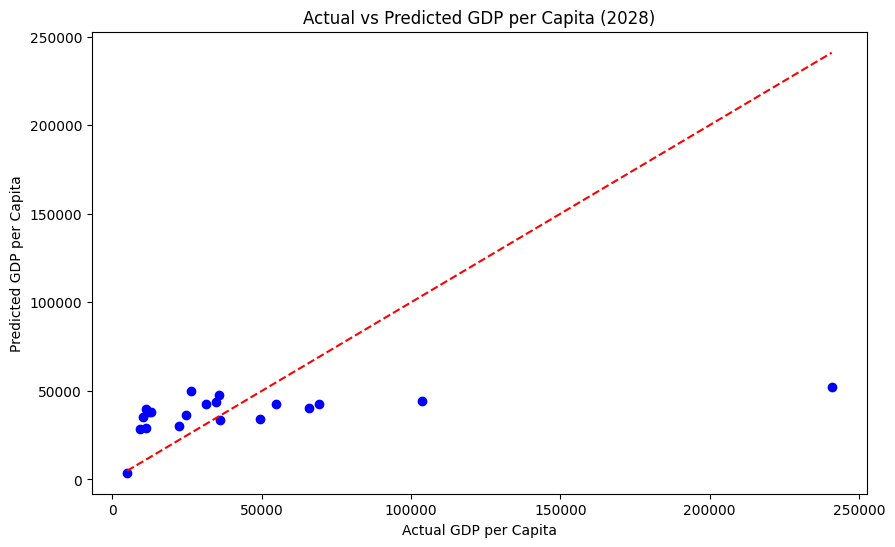

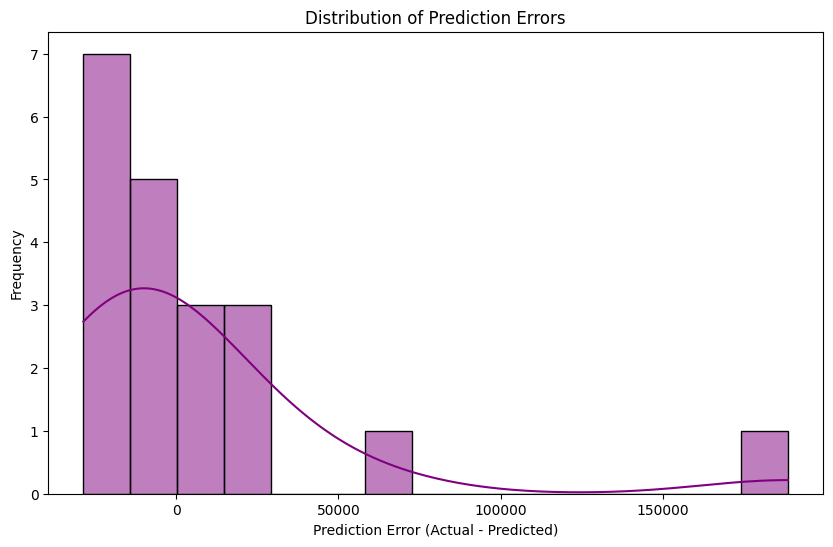

<ipython-input-69-c127cdfb792c>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=population_columns, y=feature_importance, palette='viridis')


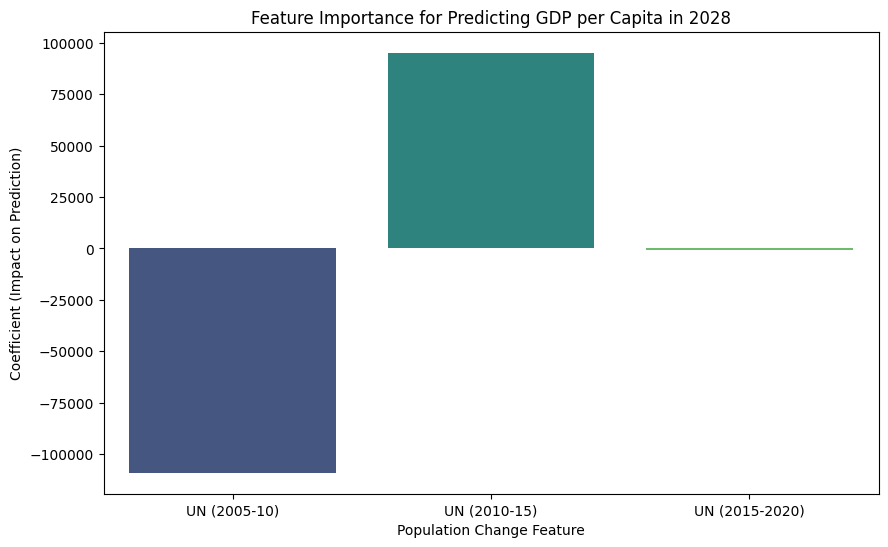

Mean Squared Error for Mean Model: 2731106806.0299997


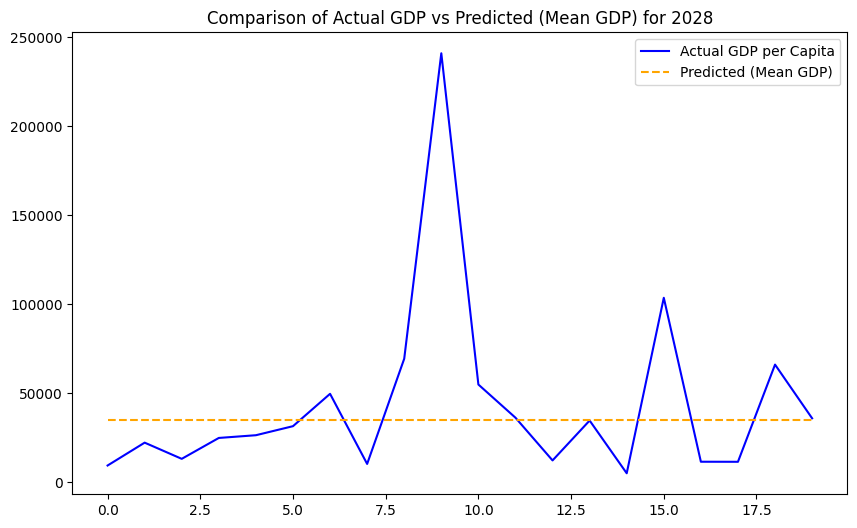

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the datasets
gdp_data = pd.read_csv('gdp_per_capita.txt', delimiter=';')
population_data = pd.read_csv('global_population_change.txt', delimiter=';')

# clean data
# convert all values to float
gdp_data['GDP per capita'] = gdp_data['GDP per capita'].replace(',', '', regex=True).astype(float)

# process data
merged_data = pd.merge(gdp_data, population_data, on='Country')

merged_data['GDP per capita'] = merged_data['GDP per capita']

# select population change columns (2005-2023) and GDP per capita for 2028
population_columns = ['UN (2005-10)', 'UN (2010-15)', 'UN (2015-2020)']
X = merged_data[population_columns]  # Features (population change)
y = merged_data['GDP per capita']  # Target (GDP per capita in 2028)

# handle missing data
merged_data.dropna(subset=['GDP per capita'], inplace=True)
X = merged_data[population_columns]
y = merged_data['GDP per capita']

# data scaling
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# visualize actual vs predicted GDP per capita for 2028
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted GDP per Capita (2028)')
plt.xlabel('Actual GDP per Capita')
plt.ylabel('Predicted GDP per Capita')
plt.show()

# visualize the distribution of errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='purple', bins=15)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

# feature Importance
feature_importance = model.coef_

plt.figure(figsize=(10, 6))
sns.barplot(x=population_columns, y=feature_importance, palette='viridis')
plt.title('Feature Importance for Predicting GDP per Capita in 2028')
plt.xlabel('Population Change Feature')
plt.ylabel('Coefficient (Impact on Prediction)')
plt.show()

# compare model performance with a simple prediction (Mean GDP)
mean_gdp = y.mean()
y_mean_pred = np.full_like(y_test, mean_gdp)

# mean squared error for the "mean" model
mse_mean = mean_squared_error(y_test, y_mean_pred)
print(f'Mean Squared Error for Mean Model: {mse_mean}')

# visualize the comparison between the actual and "mean" model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual GDP per Capita', color='blue')
plt.plot(y_mean_pred, label='Predicted (Mean GDP)', color='orange', linestyle='--')
plt.title('Comparison of Actual GDP vs Predicted (Mean GDP) for 2028')
plt.legend()
plt.show()

Question 2 - How well can we predict the adult literacy rate in 2030 of a country based on their most recently recorded literacy rates and YGPI values?





<ipython-input-75-8b20115d2130>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year (Youth)'] = pd.to_datetime(df['Year (Youth)'], format='%Y')
<ipython-input-75-8b20115d2130>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year (Adult)'] = pd.to_datetime(df['Year (Adult)'], format='%Y')
<ipython-input-75-8b20115d2130>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

(170, 9)
       Country  Rate (Youth) Year (Youth)  Rate (Adult) Year (Adult)  \
184   Zimbabwe          94.9   2014-01-01          79.3   2014-01-01   
183     Zambia          89.3   2014-01-01          75.6   2014-01-01   
182      Yemen          78.2   2014-01-01          63.1   2014-01-01   
181    Vietnam          98.5   2016-01-01          95.7   2016-01-01   
180  Venezuela          99.5   2013-01-01          94.3   2013-01-01   

     Rate (Elderly)  Year (Elderly)  YGPI Year (YGPI)  
184            61.4          2014.0   1.0  2014-01-01  
183            53.9          2014.0   1.0  2014-01-01  
182            41.4          2014.0   1.0  2014-01-01  
181            88.1          2016.0   1.0  2016-01-01  
180            74.0          2013.0   1.0  2013-01-01  
Mean Squared Error: 3.0886224618535613e-28
         Country  Predicted Adult Literacy Rate (2030)
184     Zimbabwe                                  79.3
183       Zambia                                  75.6
182        Yem

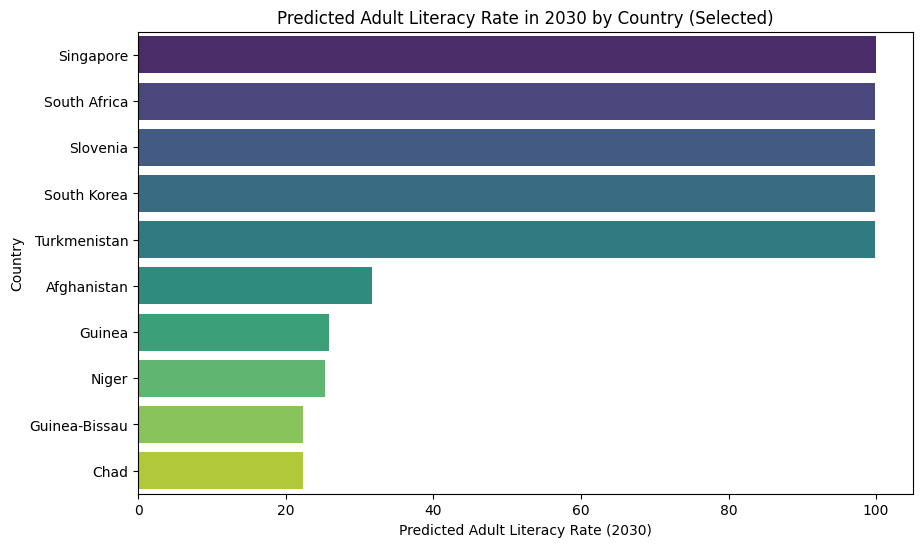

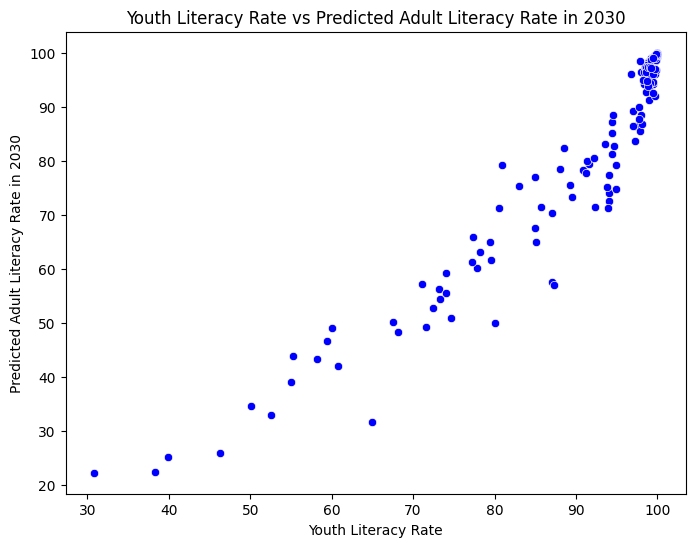

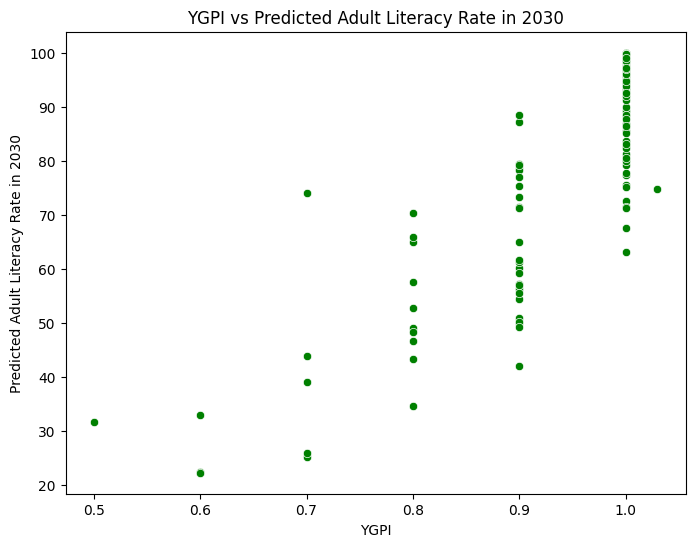

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# load the data
data = pd.read_csv('global_literacy_rates.txt', delimiter=';')

# data cleaning
# drop rows with missing relevant columns
df = data.dropna(subset=['Rate (Youth)', 'Rate (Adult)', 'YGPI'])

# select most recent data for each country (by the most recent year)
df['Year (Youth)'] = pd.to_datetime(df['Year (Youth)'], format='%Y')
df['Year (Adult)'] = pd.to_datetime(df['Year (Adult)'], format='%Y')
df['Year (YGPI)'] = pd.to_datetime(df['Year (YGPI)'], format='%Y')

# choose the latest available data for each country by 'Country' (most recent Year)
df_recent = df.sort_values(by=['Country', 'Year (Youth)'], ascending=False).drop_duplicates('Country')

# print dataset size
print(df_recent.shape)

# print first few rows
print(df_recent.head())

# feature engineering
# select relevant columns
features = ['Rate (Youth)', 'Rate (Adult)', 'YGPI']
target = 'Rate (Adult)'

# prepare the feature matrix X and target vector y
X = df_recent[features]
y = df_recent[target]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dtandardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# evaluate the model
y_pred = model.predict(X_test_scaled)

# evaluate the model using mean equared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# make predictions for 2030
df_recent['Predicted Adult Literacy Rate (2030)'] = model.predict(scaler.transform(df_recent[features]))

# display the results
print(df_recent[['Country', 'Predicted Adult Literacy Rate (2030)']])

# data visualization

# select the top and bottom 5 countries based on predicted adult literacy rate
df_recent_sorted = df_recent.sort_values(by='Predicted Adult Literacy Rate (2030)', ascending=False)
df_subset = pd.concat([df_recent_sorted.head(5), df_recent_sorted.tail(5)])

# bar plot of predicted adult literacy rates for 2030 across selected countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted Adult Literacy Rate (2030)', y='Country', data=df_subset, palette='viridis')
plt.title('Predicted Adult Literacy Rate in 2030 by Country (Selected)')
plt.xlabel('Predicted Adult Literacy Rate (2030)')
plt.ylabel('Country')
plt.show()

# scatter plot of Youth Literacy Rate vs Predicted Adult Literacy Rate (2030)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rate (Youth)', y='Predicted Adult Literacy Rate (2030)', data=df_recent, color='blue')
plt.title('Youth Literacy Rate vs Predicted Adult Literacy Rate in 2030')
plt.xlabel('Youth Literacy Rate')
plt.ylabel('Predicted Adult Literacy Rate in 2030')
plt.show()

# scatter plot of YGPI vs Predicted Adult Literacy Rate (2030)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YGPI', y='Predicted Adult Literacy Rate (2030)', data=df_recent, color='green')
plt.title('YGPI vs Predicted Adult Literacy Rate in 2030')
plt.xlabel('YGPI')
plt.ylabel('Predicted Adult Literacy Rate in 2030')
plt.show()


In [ ]:

# Step 1: Load the data (replace this with the actual file path)
data = pd.read_csv('global_literacy_rates.txt', delimiter=';')

Question 3 - Which countries with the highest Gini coefficients can we classify into distinct income inequality groups, and what are their average household incomes? Use classification algorithms for this task.


                 Location      Mean  Gini
1                 Algeria   12491.0  85.2
2                  Angola    5418.0  81.2
3     Antigua and Barbuda   30634.0  82.5
6                   Aruba   61622.0  81.9
10                Bahamas   72971.0  88.9
..                    ...       ...   ...
155                Uganda    2780.0  83.0
156  United Arab Emirates  152556.0  86.9
158         United States  551347.0  83.0
163                 Yemen    6492.0  88.4
164                Zambia    3761.0  89.0

[65 rows x 3 columns]
50.8 285.3
High inequality countries
Inequality_Group
Low Inequality       22
Medium Inequality    21
High Inequality      21
Name: count, dtype: int64
Unnamed: 0          0
Location            0
Adults              0
Median              0
Mean                0
Gini                0
Inequality_Group    1
dtype: int64
                 Location  Gini   Inequality_Group
1                 Algeria  85.2  Medium Inequality
2                  Angola  81.2     Low Inequality
3

<ipython-input-65-54bb48776a23>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_inequality_countries['Inequality_Group'] = pd.cut(high_inequality_countries['Gini'], bins=quantiles, labels=labels, right=False)
<ipython-input-65-54bb48776a23>:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_income_by_group = high_inequality_countries.groupby('Inequality_Group')['Mean'].mean()


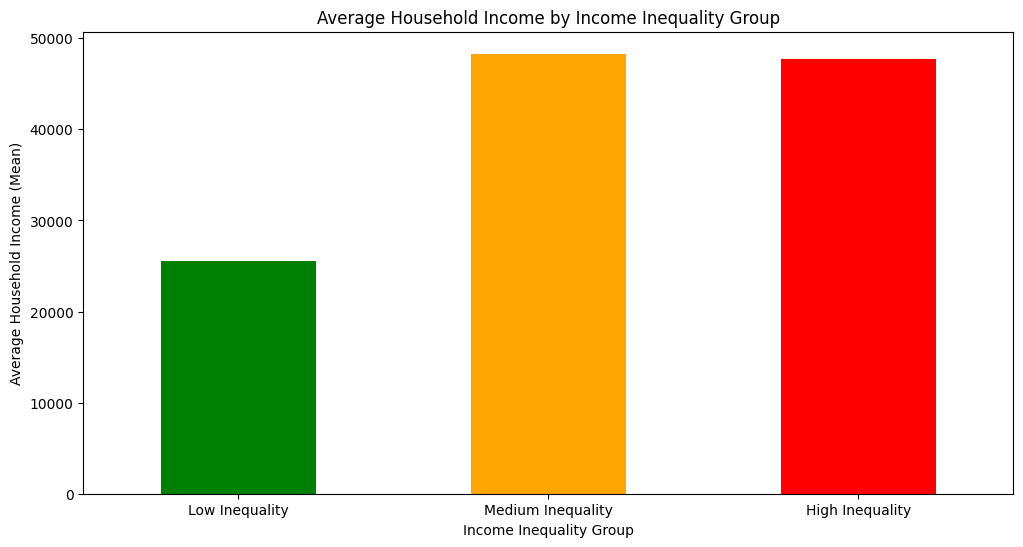

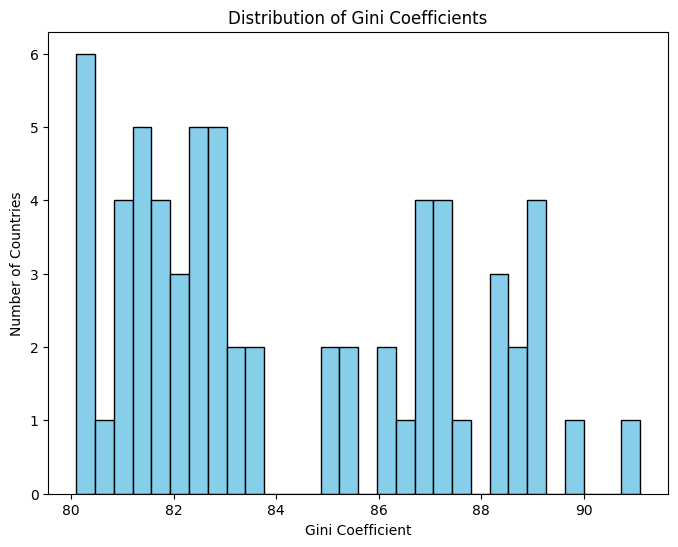

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv('median_mean_wealth.csv')

# clean the data by removing commas from numerical columns
df['Mean'] = df['Mean'].replace({',': ''}, regex=True).astype(float)
df['Median'] = df['Median'].replace({',': ''}, regex=True).astype(float)
df['Gini'] = df['Gini'].replace({',': ''}, regex=True).astype(float)

# drop any rows with missing values
df = df.dropna()

# show first few rows to understand the data
df.head()

# filter countries with high Gini coefficients (e.g., Gini > 80)
high_inequality_countries = df[df['Gini'] > 80]

medium_inequality_countries = df[(df['Gini'] >= 60) & (df['Gini'] <= 80)]

low_inequality_countries = df[df['Gini'] < 60]

# show the countries with high Gini
print(high_inequality_countries[['Location', 'Mean', 'Gini']])

# identify minimum and maximum Gini coefficients
print(df['Gini'].min(), df['Gini'].max())

# create the target variable 'Inequality_Group'
quantiles = np.percentile(high_inequality_countries['Gini'], [0, 33, 66, 100])
labels = ['Low Inequality', 'Medium Inequality', 'High Inequality']
high_inequality_countries['Inequality_Group'] = pd.cut(high_inequality_countries['Gini'], bins=quantiles, labels=labels, right=False)

print('High inequality countries')
print(high_inequality_countries['Inequality_Group'].value_counts())

# print('Medium inequality countries')
# print(medium_inequality_countries['Inequality_Group'].value_counts())

# print('Low inequality countries')
# print(low_inequality_countries['Inequality_Group'].value_counts())

print(high_inequality_countries.isna().sum())

high_inequality_countries = high_inequality_countries.dropna()

# show the resulting dataframe
print(high_inequality_countries[['Location', 'Gini', 'Inequality_Group']])

# select the features and target variable
X = high_inequality_countries[['Gini', 'Mean']]  # Features
y = high_inequality_countries['Inequality_Group']  # Target variable

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# print the evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


# group by the inequality group and calculate the average household income
average_income_by_group = high_inequality_countries.groupby('Inequality_Group')['Mean'].mean()

# show the average incomes for each group
print(average_income_by_group)

# plot average income by inequality group
plt.figure(figsize=(12, 6))
average_income_by_group.plot(kind='bar', color=['green', 'orange', 'red'])
plt.xlabel('Income Inequality Group')
plt.ylabel('Average Household Income (Mean)')
plt.title('Average Household Income by Income Inequality Group')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(high_inequality_countries['Gini'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Gini Coefficient')
plt.ylabel('Number of Countries')
plt.title('Distribution of Gini Coefficients')
plt.show()

Question 4 - Can a Gaussian model be used to find a correlation between exports and literacy rate by country?

Dataset sizes:
(205, 4)
(175, 9)


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


X_plot shape: (100, 1)
y_plot shape: (100,)
y_clean shape: (163,)


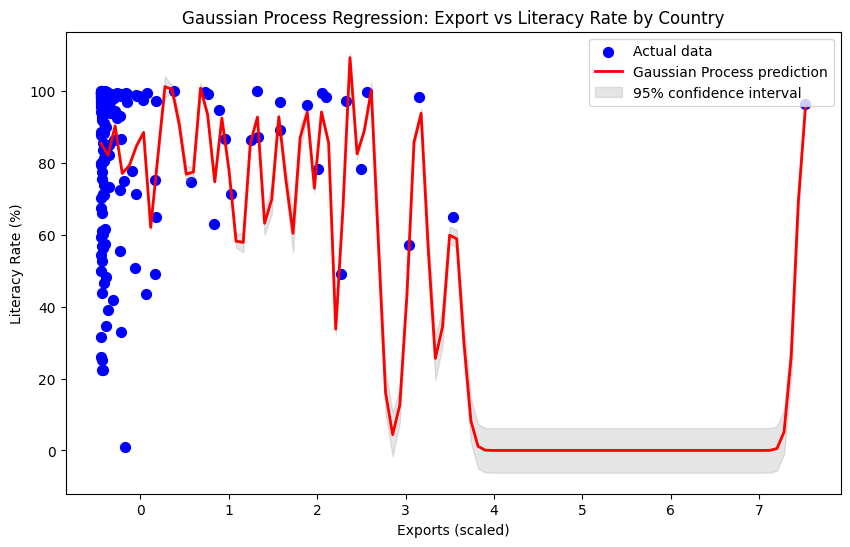

Mean Squared Error: 400.3747836817484
R^2 Score: 0.10515300257632487


In [64]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load datasets exports, literacy rates
exports = pd.read_csv('main_export_by_country.txt', delimiter=';')
lit_rates = pd.read_csv('global_literacy_rates.txt', delimiter=';')

# clean datasets, remove unnecessary columns/remove or reformat column entries
exports['Exports'] = exports['Exports'].replace({',': ''}, regex=True).astype(float)
exports = exports.sort_values(by='Country').reset_index(drop=True)
lit_rates = lit_rates.sort_values(by='Country').reset_index(drop=True)

# even out datasets
for country in lit_rates['Country']:
  if country not in exports['Country'].values:
    lit_rates = lit_rates[lit_rates['Country'] != country]

# print the sizes of each dataset
print('Dataset sizes:')
print(exports.shape)
print(lit_rates.shape)

# merge data
merged_data = pd.concat([exports, lit_rates], axis=1)

# Extract X (Exports) and y (Literacy Rates)
X = merged_data[['Exports']].values
y = merged_data['Rate (Adult)'].values

# Remove rows where 'y' (Rate) contains NaN values
mask = ~np.isnan(y)  # Create a mask for non-NaN values in 'y'
X_clean = X[mask]
y_clean = y[mask]

# Scale the 'Exports' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Define the kernel for the Gaussian Process (RBF kernel with constant term)
kernel = C(1.0, (1e-2, 1e1)) * RBF(1.0, (1e-1, 1e2))

# Instantiate the Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-1)

# Fit the model to the scaled data
gp.fit(X_scaled, y_clean)

# Create a fine grid of X values for smooth predictions
X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
y_plot, sigma_plot = gp.predict(X_plot, return_std=True)

print('X_plot shape:', X_plot.shape)
print('y_plot shape:', y_plot.shape)
print('y_clean shape:', y_clean.shape)

# visualize the results on the grid
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_clean, color='blue', label='Actual data', s=50)
plt.plot(X_plot, y_plot, color='red', label='Gaussian Process prediction', linewidth=2)
plt.fill_between(X_plot.flatten(), y_plot - 1.96*sigma_plot, y_plot + 1.96*sigma_plot, color='gray', alpha=0.2, label='95% confidence interval')
plt.xlabel('Exports (scaled)')
plt.ylabel('Literacy Rate (%)')
plt.title('Gaussian Process Regression: Export vs Literacy Rate by Country')
plt.legend()
plt.show()

# evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
# make predictions on the actual data (X_clean)
y_pred, sigma = gp.predict(X_scaled, return_std=True)
mse = mean_squared_error(y_clean, y_pred)
r2 = r2_score(y_clean, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
pip install kmodes

Question 5 - Is k-means clustering an effective approach to finding commonalities between countries grouped according to their YGPI (Youth Gender Parity Index) values for literacy rates? More specifically, can we find a correlation between YGPI and what percent of a country's GDP is used for military expenses?

(170, 9)
(151, 3)
(203, 4)
       Country  Rate (Youth)  Year (Youth)  Rate (Adult)  Year (Adult)  \
0  Afghanistan          65.0        2020.0          31.7        2011.0   
1      Albania          99.2        2012.0          97.2        2012.0   
2      Algeria          93.8        2008.0          75.1        2008.0   
3       Angola          77.4        2014.0          66.0        2014.0   
4    Argentina          99.5        2016.0          99.1        2016.0   

   Rate (Elderly)  Year (Elderly)  Year (YGPI)    YGPI  
0            20.3          2011.0          0.5  2011.0  
1            86.9          2012.0          1.0  2012.0  
2            19.5          2008.0          1.0  2008.0  
3            27.0          2014.0          0.8  2014.0  
4            97.9          2016.0          1.0  2016.0  
                      Country  Military Spending  %GDP
0    United States of America       877000000000   3.5
1  People's Republic of China       292000000000   1.6
2                    

<ipython-input-63-820ff35b1e69>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features['Top Export (2021)'] = categorical_features['Top Export (2021)'].astype('category')


PCA Component Loadings:
Component 1:
  YGPI: 0.71
  %GDP: 0.71
Component 2:
  YGPI: 0.71
  %GDP: -0.71


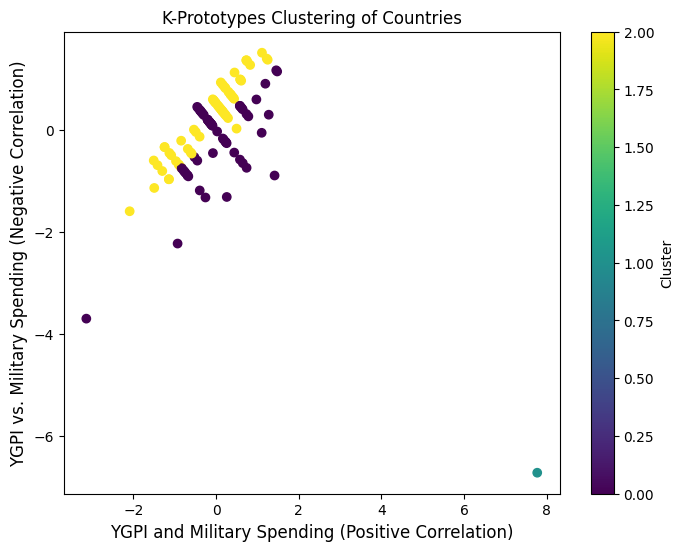

Cluster 0 - Average YGPI: 2013.69, Average Military GDP: 2.36
Most common top export in Cluster 0: Petroleum
--------------------------------------------------
Cluster 1 - Average YGPI: 2016.00, Average Military GDP: 33.50
Most common top export in Cluster 1: Sunflower seed oil
--------------------------------------------------
Cluster 2 - Average YGPI: 2014.27, Average Military GDP: 1.10
Most common top export in Cluster 2: Cars
--------------------------------------------------
Cluster 0: Pearson correlation = -0.06, p-value = 0.622
Cluster 1 has too few data points for correlation analysis.
Cluster 2: Pearson correlation = 0.09, p-value = 0.479
Silhouette Score: 0.08


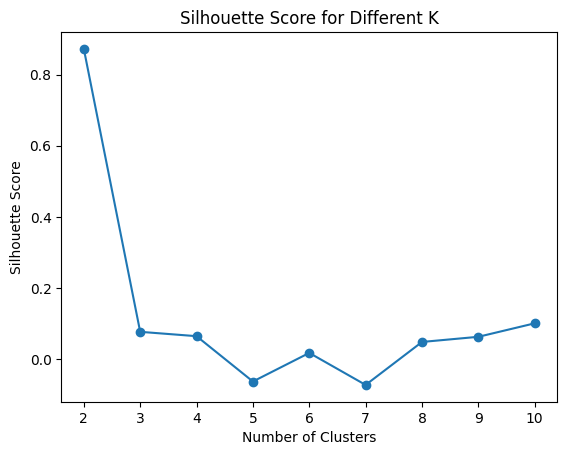

ANOVA test for Military GDP across clusters: F-statistic = 455.77, p-value = 0.000


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

# load the datasets
lit_rates = pd.read_csv('global_literacy_rates.txt', delimiter=';')
mil_spending = pd.read_csv('global_military_spending.txt', delimiter=';')
main_exports = pd.read_csv('main_export_by_country.txt', delimiter=';')

# data Preprocessing
# handle missing values if necessary
lit_rates = lit_rates.dropna(subset=['YGPI'])
mil_spending = mil_spending.dropna(subset=['%GDP'])
main_exports = main_exports.dropna(subset=['Top Export (2021)'])

# print dataset shapes and first few rows
print(lit_rates.shape)
print(mil_spending.shape)
print(main_exports.shape)
print(lit_rates.head())
print(mil_spending.head())
print(main_exports.head())

# even out the dataset sizes based on common countries
common_countries = lit_rates[lit_rates['Country'].isin(mil_spending['Country'])]
common_countries = common_countries[common_countries['Country'].isin(main_exports['Country'])]
data = pd.merge(common_countries, mil_spending, on='Country')
data = pd.merge(data, main_exports, on='Country')

print('Merged data')
print(data.shape)
print(data.head())

# feature Selection
# selecting relevant features for clustering
X = data[['YGPI', '%GDP']]
categorical_features = data[['Top Export (2021)']]

# preprocessing for k-prototypes
# standardize numerical data for k-prototypes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# encode categorical variables (Top Export) as category type
categorical_features['Top Export (2021)'] = categorical_features['Top Export (2021)'].astype('category')

# apply K-Prototypes Clustering
# using 3 clusters as an initial guess
# get the index of categorical columns (in this case just one column)
categorical_columns = [categorical_features.columns.get_loc('Top Export (2021)')]

# pass the index of the categorical column to KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)
data['Cluster'] = kproto.fit_predict(X_scaled, categorical=categorical_columns)

# visualize clusters
# 2D visualization using PCA for dimensionality reduction (if more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# get the component loadings (this shows the contribution of each feature to the components)
loadings = pca.components_

# get feature names
feature_names = X.columns

# print the loadings for each component
print("PCA Component Loadings:")
for i, component in enumerate(loadings):
    print(f"Component {i + 1}:")
    for feature, loading in zip(feature_names, component):
        print(f"  {feature}: {loading:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('YGPI and Military Spending (Positive Correlation)', fontsize=12)
plt.ylabel('YGPI vs. Military Spending (Negative Correlation)', fontsize=12)
plt.title('K-Prototypes Clustering of Countries')
plt.colorbar(label='Cluster')
plt.show()

# cluster profiling
# analyzing numerical feature distributions within each cluster
for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id} - Average YGPI: {cluster_data['YGPI'].mean():.2f}, Average Military GDP: {cluster_data['%GDP'].mean():.2f}")

    # check the most common export within the cluster
    most_common_export = cluster_data['Top Export (2021)'].mode()[0]
    print(f"Most common top export in Cluster {cluster_id}: {most_common_export}")
    print("-" * 50)

# correlation Analysis (within clusters)
# pearson correlation between YGPI and Military GDP % within each cluster
for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id]
    if len(cluster_data) > 1:  # Ensure there are enough data points for correlation
        corr, p_value = pearsonr(cluster_data['YGPI'], cluster_data['%GDP'])
        print(f"Cluster {cluster_id}: Pearson correlation = {corr:.2f}, p-value = {p_value:.3f}")
    else:
        print(f"Cluster {cluster_id} has too few data points for correlation analysis.")

# silhouette score and model evaluation
# silhouette score for evaluating clustering quality
sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

silhouette_scores = []
for n_clusters in range(2, 11):
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=42)
    clusters = kproto.fit_predict(X_scaled, categorical=categorical_columns)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))

plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

# hypothesis testing
from scipy.stats import f_oneway

# ANOVA test for military spending across clusters
military_gdp_by_cluster = [data[data['Cluster'] == cluster]['%GDP'] for cluster in sorted(data['Cluster'].unique())]
f_stat, p_value = f_oneway(*military_gdp_by_cluster)
print(f"ANOVA test for Military GDP across clusters: F-statistic = {f_stat:.2f}, p-value = {p_value:.3f}")
